In [11]:
import numpy as np
import matplotlib.pyplot as plt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


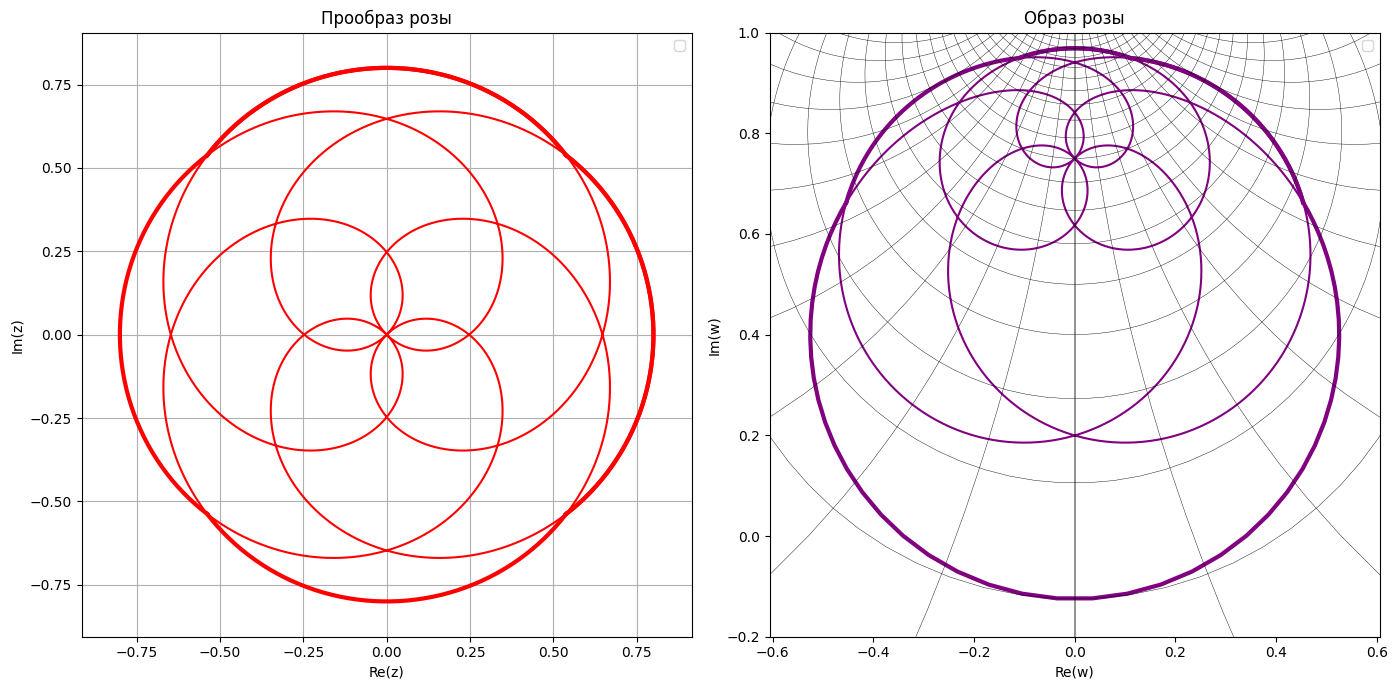

In [12]:
alpha = 0.8
beta = 2 / 5

def rose(t, alpha, beta):
    return alpha * np.cos(beta * t)

t = np.linspace(0, 10 * np.pi, 5000)
z = rose(t, alpha, beta) * np.exp(1j * t)

def f(z):
    return (4*z+3j)/(4-3j*z)

w = f(z)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(z.real, z.imag, color='red')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Прообраз розы')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

for i in range(1, 7):
    phi_i = np.linspace((-np.pi / 4 + (10/4)*(np.pi) * (i - 1)), (np.pi / 4 + ((10/4)* np.pi) * (i - 1)), 50)
    rho = 0.8 * abs(np.cos(2 / 5 * phi_i))
    z = rho * (np.cos(phi_i) + 1j * np.sin(phi_i))
    plt.plot(z.real, z.imag, color='red', linewidth=3)

plt.subplot(1, 2, 2)
plt.plot(w.real, w.imag, color='purple')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.title('Образ розы')
plt.legend()
plt.axis('equal')

for i in range(1, 7):
    phi_i = np.linspace((-np.pi / 4 + (10/4)*(np.pi) * (i - 1)), (np.pi / 4 + ((10/4)* np.pi) * (i - 1)), 50)
    rho = 0.8 * abs(np.cos(2 / 5 * phi_i))
    z = rho * (np.cos(phi_i) + 1j * np.sin(phi_i))
    f = (4*z+3j)/(4-3j*z)
    plt.plot(f.real, f.imag, color='purple', linewidth=3)

for i in range(-3000, 1000):
    x = np.linspace(-2, 2, 150)
    y = np.linspace(i / 10, i / 10, 150)
    z = x + 1j * y
    f = (4*z+3j)/(4-3j*z)
    plt.plot(f.real, f.imag, color='black', linewidth=0.3)
for i in range(-3000, 1000):
    x = np.linspace(i / 10, i / 10, 100)
    y = np.linspace(-2, 2, 100)
    z = x + 1j * y
    f = (4*z+3j)/(4-3j*z)
    plt.plot(f.real, f.imag, color='black', linewidth=0.3)

plt.xlim(-0.5, 0.5)
plt.ylim(-0.2, 1)

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


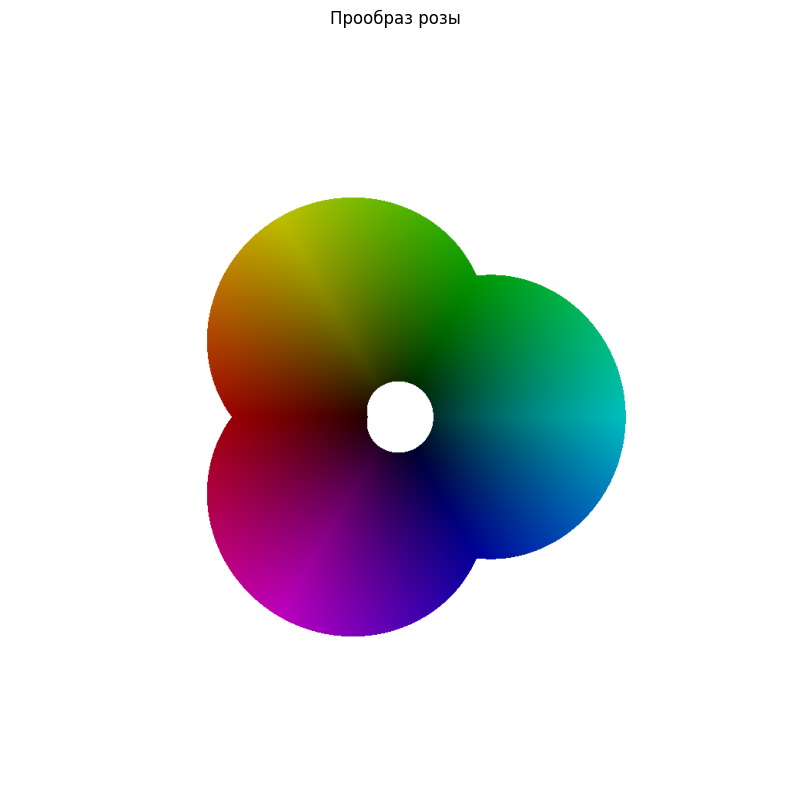

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


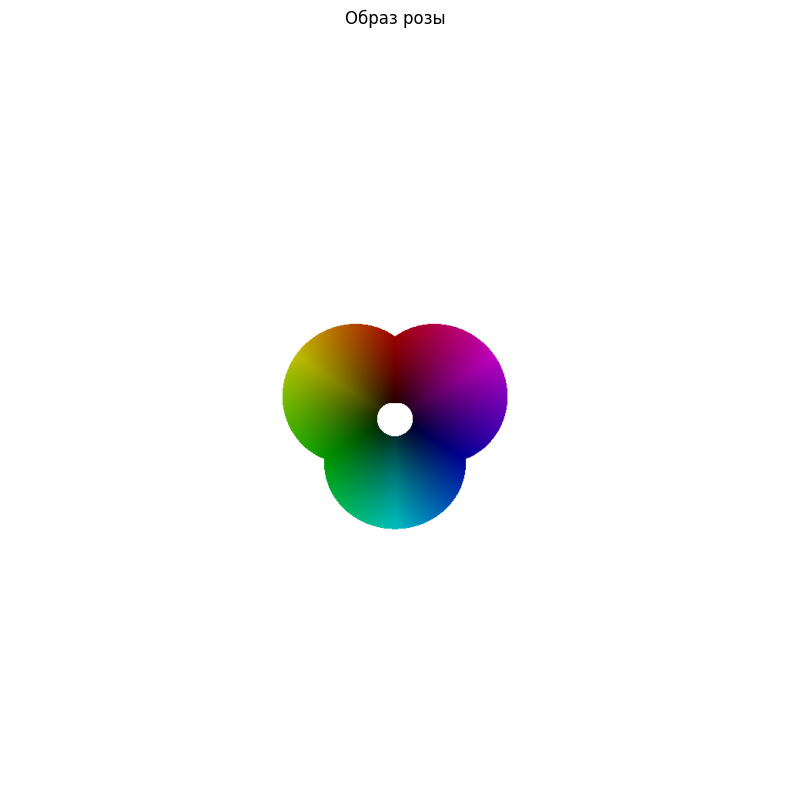

In [13]:
def hsl_coloring(z, a=1):
    h = np.angle(z) / (2 * np.pi) + 0.5  
    s = np.ones_like(z, dtype=float) 
    l = (np.abs(z)**a) / (np.abs(z)**a + 1)
    return np.dstack((h, s, l)).astype(float)

def to_rgb(hsl):
    h, s, l = hsl[..., 0], hsl[..., 1], hsl[..., 2]
    c = (1 - np.abs(2 * l - 1)) * s
    x = c * (1 - np.abs(np.mod(h * 6, 2) - 1))
    m = l - c / 2

    rgb = np.zeros(hsl.shape, dtype=float)

    h = h * 6
    i = (h < 1)
    rgb[i] = np.dstack((c[i], x[i], np.zeros_like(c[i]))) + m[i][..., np.newaxis]

    i = (1 <= h) & (h < 2)
    rgb[i] = np.dstack((x[i], c[i], np.zeros_like(c[i]))) + m[i][..., np.newaxis]

    i = (2 <= h) & (h < 3)
    rgb[i] = np.dstack((np.zeros_like(c[i]), c[i], x[i])) + m[i][..., np.newaxis]

    i = (3 <= h) & (h < 4)
    rgb[i] = np.dstack((np.zeros_like(c[i]), x[i], c[i])) + m[i][..., np.newaxis]

    i = (4 <= h) & (h < 5)
    rgb[i] = np.dstack((x[i], np.zeros_like(c[i]), c[i])) + m[i][..., np.newaxis]

    i = (5 <= h) & (h < 6)
    rgb[i] = np.dstack((c[i], np.zeros_like(c[i]), x[i])) + m[i][..., np.newaxis]

    return rgb

alpha1, beta1, alpha2, beta2 = 0.1, 1/4, 0.6, 3/4
grid_size = 1000
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

R = np.abs(Z)
Arg = np.angle(Z)
max_cos1 = np.abs(np.cos(beta1 * (Arg + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
max_cos2 = np.abs(np.cos(beta2 * (Arg + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
mask = (alpha1 * max_cos1 <= R) & (R <= alpha2 * max_cos2)

hsl = hsl_coloring(Z)
rgb = to_rgb(hsl)
rgb[~mask] = 1  

plt.figure(figsize=(10, 10))
plt.imshow(rgb, extent=[-1, 1, -1, 1])
plt.title('Прообраз розы')
plt.axis('off')
plt.show()

def conformal_map(z):
    return -2j*np.tanh(z)

W = conformal_map(Z)

W = np.conj(W)

R_w = np.abs(W)
Arg_w = np.angle(W)
max_cos1_w = np.abs(np.cos(beta1 * (Arg_w + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
max_cos2_w = np.abs(np.cos(beta2 * (Arg_w + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
mask_w = (alpha1 * max_cos1_w <= R_w) & (R_w <= alpha2 * max_cos2_w)

hsl_w = hsl_coloring(W)
rgb_w = to_rgb(hsl_w)
rgb_w[~mask_w] = 1 

plt.figure(figsize=(10, 10))
plt.imshow(rgb_w, extent=[-1, 1, -1, 1])
plt.title('Образ розы')
plt.axis('off')
plt.show()